<div style='display:block;float:left;'>
    <img src='https://msc-ai.iit.demokritos.gr/sites/default/files/papei-en-h42.png' width='150' style='display:inline-block;'>
    <img src='https://msc-ai.iit.demokritos.gr/sites/default/files/ncsr-en-h42.png' width='150' style='display:inline-block;margin-bottom:5px;margin-left:25px;'>
</div>  <br><br><br><br>

#  <font color='#57998f'>Q-learning  |  Multiagent Coordination Game </font>


Current notebook is part of the **'Reinforcement Learning'** assignment in the context of **'Machine Learning'** course, <br> provided by **MSc in Artificial Intelligence**. 

<br>

> Chiotis Nikolaos - MTN2221 <br>
> Filios Alexandros - MTN2219 <br>

<br><br>

##  <font color='#37665f'>Contents</font> 

[1.Introduction](#Introduction) <br>
[2.Implementation Description](#Implementation-Description) <br>
[3.Code](#Code) <br>
[4.Experimental Results](#Experimental-Results) <br>
[5.Experiment with Different Learning Rate](#Experiment-with-Different-Learning-Rate) <br>
[6.Experiment with Different Graph Layout](#Experiment-with-Different-Graph-Layout) <br>
[7.Experiment with Different X & Y Balance](#Experiment-with-Different-X-&-Y-Balance) <br>

<br><br>

##  <font color='#37665f'>Introduction</font> 

#### <font color='#425451'>Game Description</font> 

In this report, we will present an implementation of a Q-learning, ε-greedy agent system for a repeated coordination game. 
Players can select between 2 actions (1 & 2) and the payoff matrix is given in the matrix below:  
<table>
    <tr><th>Actions</th><th>1</th><th>2</th></tr> 
    <tr><th>1</th><td>(1,1)</td><td>(0,0)</td></tr>
    <tr><th>2</th><td>(0,0)</td><td>(1,1)</td></tr>
</table>

The agents belong to one of two types, X and Y, with X preferring action 1 over action 2 and Y preferring action 2 over action 1. The agents communicate with each other sparsely in an adjacency graph of our choice, and have no knowledge of the game or the repertoire of actions of the other agents.  

Our implementation is an application of Q-learning, ε-greedy algorithm.

#### <font color='#425451'>Q-learning</font> 

Q-learning is a type of reinforcement learning algorithm that is used to find the optimal action-selection policy for an agent in a specific environment. The basic idea behind Q-learning is to use a function, called the Q-function, to estimate the expected long-term reward for an agent when it takes a certain action in a given state. The Q-function is typically represented by a table or a neural network, and it is updated during the learning process to more accurately reflect the expected rewards for different actions in different states.

The Q-function is defined as $Q(s,a)$, where $s$ is the current state, and $a$ is the action taken in that state. The Q-function estimates the expected cumulative future reward for an agent starting from state %s% and taking action $a$. The agent's goal is to find the action-value function $Q^*(s,a)$ that maximizes the expected cumulative reward.

In Q-learning, the agent interacts with the environment by taking actions and receiving rewards. At each time step, the agent selects an action based on its current state and the current estimates of the Q-function. The agent then receives a reward for the action and updates the Q-function to more accurately reflect the new information about the expected rewards for that action in that state. This process is repeated until the agent reaches a stopping criterion, such as a maximum number of iterations or a satisfactory level of performance.

The Q-function is updated using the Q-learning update rule, which is a variation of the Bellman equation, a fundamental equation in dynamic programming. The Q-learning update rule states that the Q-value of a state-action pair is updated by taking the current Q-value and adjusting it by a small value proportional to the difference between the expected reward and the current estimate. 

The update rule is as follows:

$$ Q(s,a) = Q(s,a) + α(r + γ Q(s',a') - Q(s,a)) $$

Where:

- $s$: represents the current state of an agent in an environment.
- $a$: current action taken by the agent when it is in a particular state.
- $α$: learning rate
- $r$: reward for taking action a in state s the agent will get a positive or negative reward).
- $γ$: discount factor
- $s'$: next state
- $a'$: next action
- $Q(s',a')$: Q-value of the action in next state s', that has the maximum Q-value for the state

The Q-function is used to select actions by choosing the action that has the highest Q-value for the current state. This is known as the greedy policy.

#### <font color='#425451'>ε-Greedy algorithm</font> 

The ε-greedy algorithm is a method used to balance exploration and exploitation during the learning process. In the ε-greedy algorithm, the agent selects actions according to the following rule: with probability ε, a random action is chosen, and with probability 1-ε, the action that has the highest estimated Q-value is chosen. The value of ε is called the exploration rate and it's used to control the trade-off between exploration and exploitation. At the beginning of the learning process, ε is set to a high value to allow the agent to explore the environment and gather information about the different states and actions. As the learning process progresses, ε is gradually decreased, allowing the agent to become more exploitation-focused and make use of the information it has gathered.

The Q-learning, ε-greedy algorithm is a popular method for solving multi-agent reinforcement learning problems, where the agents learn to make optimal decisions based on their own actions and the rewards received from the environment. The ε-greedy exploration strategy allows the agents to balance exploitation of their current knowledge with exploration of new actions.

#### <font color='#425451'>References</font> 
[1] Shoham, Y., & Leyton-Brown, K. (2008). Multiagent systems: Algorithmic, game-theoretic, and logical foundations. Cambridge University Press.  

[2] Wunder, M., Littman, M. L., & Babes, M. (2010). Classes of multiagent q-learning dynamics with epsilon-greedy exploration. In Proceedings of the 27th International Conference on Machine Learning (ICML-10) (pp. 1167-1174).


<br><br>

##  <font color='#37665f'>Implementation Description</font> 

#### <font color='#425451'>Project Structure</font> 

Project consists of 2 main modules. First, is the implementation of **QLearningPlayer** class, which implements the Q-learning, ε-greedy algorithm, as described in the introduction. Second, is the **play_game()** function, that simulates a game, as described in the assignment's description, based on user-input parameters. 

#### <font color='#425451'>QLearningPlayer</font> 

QLearningPlayer class implements Q-learning, ε-greedy algorithm as described in the introduction.  
Agent using a number of initiation parameters: 

| Argument | Description |
| :-: | :- |
| **alpha** | Learning rate parameter of Q-learning update formula |
| **gamma** | Discound rate parameter of Q-learning update formula  |
| **actions** | The set of actions that are available to the agent. In our case [1,2] |
| **agent_type** | Type 'X' or 'Y' of the agent. Used to initiate preferences on actions |
| **agent_id** | The agent id, used to distinguish agents of the problem |
| **epsilon** | Initial ε-greedy exploration parameter. Default value: 1 |
| **decay_rate** | The value that will substracted from epsilon each time we reduce it. Default value: 0.01 |
| **decay_step** | The period of episodes that we will reduce epsilon. Default value: 20 |
| **state_init** | The initial state of the agent. Default value: 's' |
| **use_kappa** | True if we are going to update alpha parameter using 1/kappa method. False if a stable alpha will be used. |

Functions of QLearningPlayer: 

| Function | Description |
| :-: | :- |
| **init** | Initializes agent variables. Action preferences based on X/Y type. |
| **init_state** | Initializes Q(s,a) values for each new state observed. |
| **new_episode** | Function that updated epsilon, based on decay_rate & decay_step. |
| **take_action** | Function that selects action, based on ε-greedy algorithm. |
| **learn** | Receives the reward from the environment and updated Q values. |
| **update_Q** | Helper function that implements the formula introduced in the introduction. |


#### <font color='#425451'>play_game()</font> 

Function play_game() simulates the described game. Starts by initializing agent types and agent adjacency dictionary, based on how the agents are connected. It then initializes agents and starts the game for **episodes** number of episodes. Each episode consists of a random number of rounds, minimum 2 (since the game is repeated) and maximum **max_rounds**. Each round, players take an **action** and then they receive the calculated **rewards**. Based on the rewards, the agents **learn and update Q**. Each episode, the **epsilon updates**. At the end of the game, the game history is returned.  

##  <font color='#37665f'>Code</font> 

#### <font color='#425451'>Dependencies</font> 

In [61]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#### <font color='#425451'>QLearningPlayer Class</font> 

In [20]:
class QLearningPlayer():

    def __init__(self, alpha, gamma, actions, agent_type, agent_id, epsilon=1, 
                 decay_rate=0.01, decay_step=20, state_init='s', use_kappa=False):

        self.agent_id = agent_id
        self.use_kappa = use_kappa
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.decay_rate = decay_rate
        self.decay_step = decay_step
        self.actions = actions
        self.state = state_init
        self.states = []
        self.Q = {}
        self.action = None
        self.episode = 0
        
        if agent_type == 'X':
            self.action_preferece = [0.6, 0.4] # agents X prefer action 1 comparing to action 2
        else:
            self.action_preferece = [0.4, 0.6] # agents Y prefer action 2 comparing to action 1
        
        self.init_state(state_init)
        self.game_history = []
        
        
    def init_state(self, state):
        
        self.states.append(state)

        for action in self.actions: 
                self.Q[(state, action)] = 1

                
    def new_episode(self):
        
        self.episode += 1
        
        if (self.episode % self.decay_step == 0) & (self.epsilon > 0):
            self.epsilon -= self.decay_rate
        
        
    def take_action(self, learning=True):

        if learning & (np.random.rand() < self.epsilon): 
            self.action = np.random.choice(self.actions, p=self.action_preferece)
        else:
            self.action = max(self.Q, key=self.Q.get)[1]

        return self.action

    
    def learn(self, reward, state='s'):
        
        if state not in self.states: 
            self.init_state(state)
        
        self.update_Q(reward, state)

        self.game_history.append((self.state, self.action))
        
        self.state = state

    def update_Q(self, reward, new_state):
        
        if self.use_kappa: 
            kappa = len([i for i in self.game_history if i == (self.state, self.action)])
            alpha = 1/kappa if kappa>0 else self.alpha
        else:
            alpha = self.alpha
        
        current_Q = self.Q[(self.state, self.action)]
        
        new_state_max_Q = max([self.Q[i] for i in self.Q if i[0]==new_state])
        
        updated_Q = current_Q + alpha*(reward + self.gamma*new_state_max_Q - current_Q)
        
        self.Q[(self.state, self.action)] = updated_Q

#### <font color='#425451'>Function play_game() </font> 

In [66]:
def play_game(episodes, max_rounds, agents, agent_types, agent_graph):

    # initialize game history dataframe
    game_history = pd.DataFrame(columns=['episode', 'round', 'agent', 'action', 'reward', 'epsilon'] \
                                + ['Q(' + str(i) + ')' for i in actions])

    
    # episodes iteration
    for episode in range(1, episodes+1):
        
        # for each episode, update epsilon for all agents
        for agent in agents:
            agent.new_episode()
        
        # play the repeated game for random rounds
        for game_round in range(np.random.randint(2,max_rounds+1)):
            
            # agents take action
            for agent in agents:
                agent.take_action()
            
            # for each agent, we calculate the reward and feed it in learn function
            for agent in agents:
                # +1 reward for each neighbor of the agent that played the same action
                reward = sum([1 for i in agent_graph[agent.agent_id] if agent.action == agents[i].action])
                agent.learn(reward, state='s')
                game_history = pd.concat([game_history, 
                                          pd.DataFrame.from_records([{'episode':episode, 'round':game_round, 
                                                                      'agent':agent.agent_id,'action':agent.action, 
                                                                      'reward':reward, 'epsilon':agent.epsilon} \
                                                                     | {'Q(' + str(i[1]) + ')':agent.Q[i] for i in agent.Q}])])

    return game_history

##  <font color='#37665f'>Experimental Results</font> 

#### <font color='#425451'>Game Initialization</font> 

We start by initializing the payoff matrix and the available actions, as described in the description.

In [3]:
payoff_matrix = np.array([[ (1,1), (0,0)],
                          [ (0,0), (1,1)]])

actions = [1,2]

#### <font color='#425451'>Graph Initialization</font> 
We initiate the graph by assigning 'X' or 'Y' types randomly to agents.  
Then, we define the way that the agents are connected. Finally, we plot the agent graph.

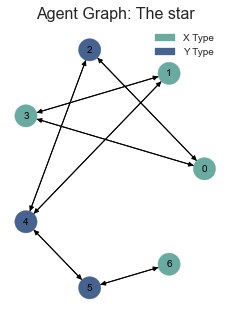

In [64]:
# randomly choose agent types
agent_types = {i:np.random.choice(['X','Y']) for i in range(0,7)}

# define agent graph
agent_graph= {0: [2,3], 1: [3,4], 2: [0,4], 3: [0,1], 4: [1,2,5], 5: [4,6], 6: [5]}

# plot graph
g = nx.DiGraph(agent_graph)
fig = plt.figure()
fig.set_size_inches(3, 4)
nx.draw(g,pos=nx.circular_layout(g),node_color=['#6aaba1' if i == 'X' else '#46628f' for i in agent_types.values() ],
        with_labels=True,node_size=500,font_size=10)
plt.title('Agent Graph: The star', fontsize=16)
plt.legend(handles=[mpatches.Patch(color='#6aaba1', label='X Type'), 
                    mpatches.Patch(color='#46628f', label='Y Type')], loc='upper right')
plt.show()

#### <font color='#425451'>Experiment</font> 
We simulate a game as described at the introduction. For the first experiment, we initialize the agents with a stable $ alpha = 0.2 $ and $ gamma = 0.9 $. Agents wil play for $ episodes = 2500 $, each episode will have a random number of repeated rounds, with $ maxRounds = 5 $. ε-Greedy parameters will be the default of the function, that are the ones described in the assignment. Initial $ epsilon = 1 $, and the epsilon will be decreased by $ decayRate = 0.01 $ with a step of $ decayStep=20 $. This way the 4/5 of the episodes will be played with an epsilon > 0 and the last 1/5 episodes will be played with epsilon = 1, leaving the agents to apply their best policy.

In [68]:
episodes = 2500
max_rounds = 5
alpha = 0.2
gamma = 0.9

agents = [QLearningPlayer(alpha,gamma,actions,agent_types[i],i) for i in agent_types]

game_log = play_game(episodes, max_rounds, agents, agent_types, agent_graph)

#### <font color='#425451'>Results</font> 

As we can see below, during the last 1/5 of the episodes, at the exploitation episodes, agends played all the same action ($ Action$ $ 2 $) meaning that **all agents coordinated in the same action**. <br>
Number of rounds includes all rounds inside the episodes.

In [79]:
game_log[game_log['episode']>2000].groupby(['agent','action']).size().to_frame() \
                                  .rename(columns={0:'Number of Rounds'}).reset_index()

,agent,action,Number of Rounds
0,0,2,1757
1,1,2,1757
2,2,2,1757
3,3,2,1757
4,4,2,1757
5,5,2,1757
6,6,2,1757


#### <font color='#425451'>Q Value Plots per Episode</font> 

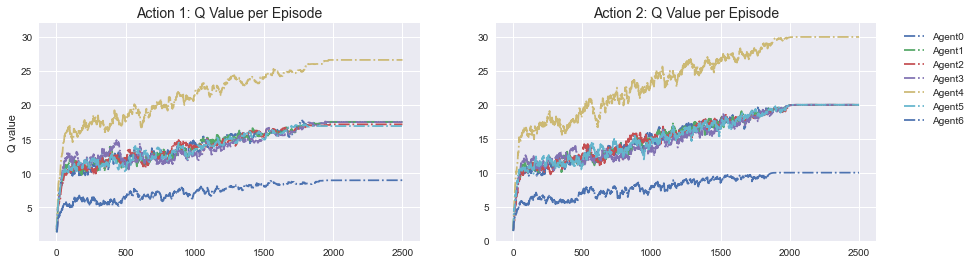

In [114]:
plt.show()

#### <font color='#425451'>Average Reward per Episode (per agent)</font> 

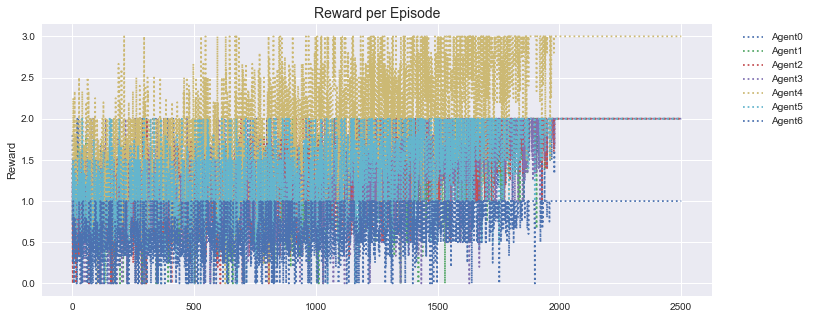

In [123]:
plt.show()

#### <font color='#425451'>Average Reward per Episode (per agent type)</font> 

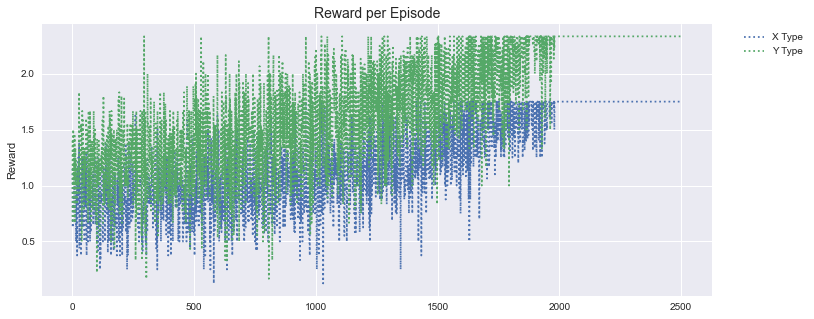

In [129]:
plt.show()

#### <font color='#425451'>Conclusion</font> 

At the exploitation stage of the game, we can see that all agents play the same action.  
The action that all agents choose is Action 2, this makes sense, since the majority of the agents (4 out of 7) are Type Y agents, so they were tending to prefer Action 2.   
As the game evolves, we can see that Q values of the agents are converge to a highest point. We can also see that this highest point is relative to the number of connections each agent has. The agent with only one connection has the lowest Q value, the agent with 3 connections has the highest Q value, while all the others that have 2 connections, converge to the same Q value. Q values of Action 2 are higher that Q values of Action 1. 
Regarding the rewards, as the exploration & exploitation part of the game evolves, we can see that agents take various rewards, when we get into exploitation only part of the game, all agents get their maximum reward, based on their connections.

##  <font color='#37665f'>Experiment with Different Learning Rate</font> 

At this section we are going to investigate how different learning rate parameter, is affecting the convergence of the agent system. We are going to test for: $$ alpha = 0.1 , alpha = 0.5 , alpha = 0.8 , alpha = 1/k $$  For the last paramter value, k is the number of the times the agent has played each action. This method is suggested for repeated stohastic games, in order for the alpha to tend to 0 as the game is evolving.  
Method described in *Shoham, Y., & Leyton-Brown, K. (2008). Multiagent systems: Algorithmic, game-theoretic, and logical foundations. Cambridge University Press.*

In [131]:
alpha = 0.1
agents = [QLearningPlayer(alpha,gamma,actions,agent_types[i],i) for i in agent_types]
game_log_1 = play_game(episodes, max_rounds, agents, agent_types, agent_graph)

alpha = 0.5
agents = [QLearningPlayer(alpha,gamma,actions,agent_types[i],i) for i in agent_types]
game_log_2 = play_game(episodes, max_rounds, agents, agent_types, agent_graph)

alpha = 0.8
agents = [QLearningPlayer(alpha,gamma,actions,agent_types[i],i) for i in agent_types]
game_log_3 = play_game(episodes, max_rounds, agents, agent_types, agent_graph)

alpha = 0.1
use_kappa = True
agents = [QLearningPlayer(alpha,gamma,actions,agent_types[i],i,use_kappa=use_kappa) for i in agent_types]
game_log_4 = play_game(episodes, max_rounds, agents, agent_types, agent_graph)

#### <font color='#425451'>Results</font> 

After reviewing the results, we can observe various differences that are caused by different alpha parameters.   
At experiments with $ alpha = 0.1 $ and $ alpha = 0.8 $, all agents converged to action 1.  
At experiment with $ alpha = 0.5 $, all agents converged to action 2.  
At experiment with $ alpha = 1/k $, 2000 episodes were not enough for the agents to converge to the same action. In fact, most of the agents converged to action 2, however agents 0 and 3 are still choosing action 1. As we can see on the agents graph, agent 3 is type X and only connects with 2 other type X agents and agent 0 is type X and one out of two connected agents is type X. This, combined that in this method alpha parameters becomes too small as the episodes evolve, the episodes where not enough for those 2 agents. 

#### <font color='#425451'>Q Value Plots per Episode</font> 

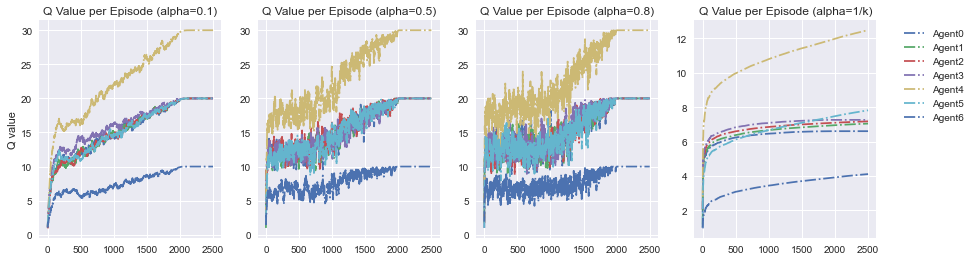

In [151]:
plt.show()

#### <font color='#425451'>Conclusion</font> 

We can see that with smaller learning rates like first and last case, Q values have smaller variance between episodes, and converge more smoothly to the final value. Cases 2 & 3 that have bigger learning rates, have higher varianve of Q between episodes.   
For alpha = 1/k, we can see that there is a larger increase of Q at the first episodes and very small increase while the episodes are evolving. 

##  <font color='#37665f'>Experiment with Different Graph Layout</font> 

At this section we are going to investigate how different agent layout affect convergence of the agent system. We are going to create a graph, that all agents have 2 connections. Also, there are no cases that an agent connects only to same-type agents, like the previous graph.  
We are going to implement 2 experiments for: 
$$ alpha = 0.1 , alpha = 1/k  $$

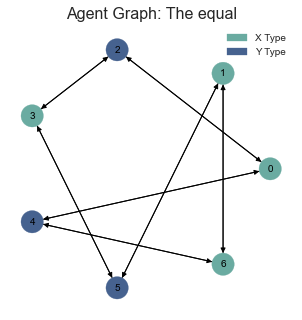

In [155]:
# define agent graph
agent_graph= {0: [2,4], 1: [5,6], 2: [0,3], 3: [2,5], 4: [0,6], 5: [1,3], 6: [1,4]}

# plot graph
g = nx.DiGraph(agent_graph)
fig = plt.figure()
fig.set_size_inches(4, 4)
nx.draw(g,pos=nx.circular_layout(g),node_color=['#6aaba1' if i == 'X' else '#46628f' for i in agent_types.values() ],
        with_labels=True,node_size=500,font_size=10)
plt.title('Agent Graph: The equal', fontsize=16)
plt.legend(handles=[mpatches.Patch(color='#6aaba1', label='X Type'), 
                    mpatches.Patch(color='#46628f', label='Y Type')], loc='upper right')
plt.show()

In [156]:
alpha = 0.1
agents = [QLearningPlayer(alpha,gamma,actions,agent_types[i],i) for i in agent_types]
game_log_5 = play_game(episodes, max_rounds, agents, agent_types, agent_graph)

alpha = 0.1
use_kappa = True
agents = [QLearningPlayer(alpha,gamma,actions,agent_types[i],i,use_kappa=use_kappa) for i in agent_types]
game_log_6 = play_game(episodes, max_rounds, agents, agent_types, agent_graph)

#### <font color='#425451'>Results</font> 

At experiments with $ alpha = 0.1 $, all agents converge to action 2.  
At experiment with $ alpha = 1/k $, again the number of episodes were not enough for the algorithm to converge to a common action for all agents.

#### <font color='#425451'>Q Value Plots per Episode</font> 

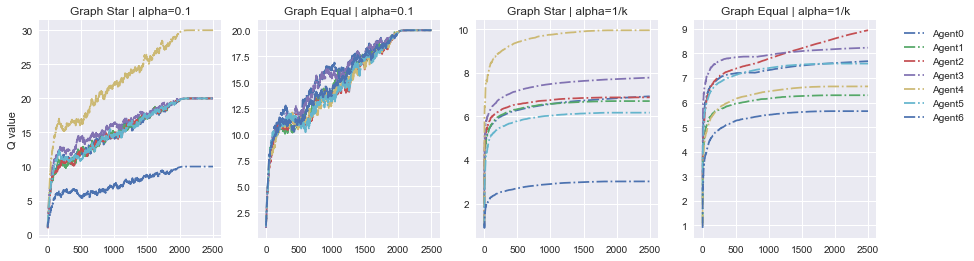

In [165]:
plt.show()

#### <font color='#425451'>Conclusion</font> 

At first ans second plot, we can see the output for the first and second graph layout for alpha = 0.1. We can see that at the second layout, that the number of connections are equal between the agents, all agents are converging to the same Q value.  
At third and fourth plot, we can see the output for the first and second graph layout for alpha = 1/k.We can see that the Q values are more consensed to one value, however they not converge. 

##  <font color='#37665f'>Experiment with Different X & Y Balance</font> 

At this section we are going to investigate how different balance between type X and type Y agents.  
We are going to implement 4 experiments for: 
$$ numX = 2 , numX = 4 , numX = 6  $$

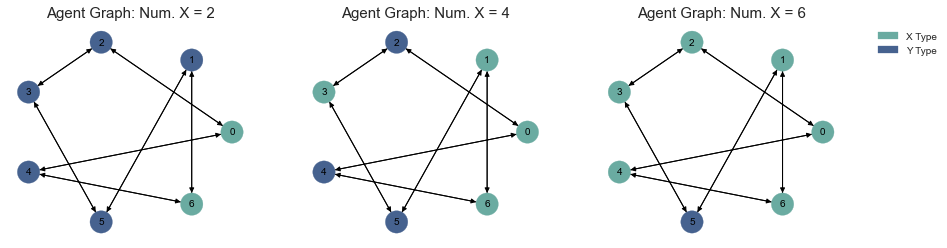

In [177]:
# define agent graph
agent_graph= {0: [2,4], 1: [5,6], 2: [0,3], 3: [2,5], 4: [0,6], 5: [1,3], 6: [1,4]}

# define agent types
agent_types2 = {0: 'X', 1: 'Y', 2: 'Y', 3: 'Y', 4: 'Y', 5: 'Y', 6: 'X'}
agent_types6 = {0: 'X', 1: 'X', 2: 'X', 3: 'X', 4: 'X', 5: 'Y', 6: 'X'}

# plot graph
plt.show()

In [179]:
alpha = 0.1
agents = [QLearningPlayer(alpha,gamma,actions,agent_types2[i],i) for i in agent_types2]
game_log_7 = play_game(episodes, max_rounds, agents, agent_types2, agent_graph)

agents = [QLearningPlayer(alpha,gamma,actions,agent_types6[i],i) for i in agent_types6]
game_log_8 = play_game(episodes, max_rounds, agents, agent_types6, agent_graph)

#### <font color='#425451'>Results</font> 

At experiments with 2 type X agents and 5 type Y agents, all agents converge to action 2, due to majority of Y.  
At experiments with 4 type X agents and 3 type Y agents, all agents converge to action 1, due to majority of X.  
At experiments with 6 type X agents and 1 type Y agent, all agents converge to action 1, due to majority of X.

#### <font color='#425451'>Q Value Plots per Episode</font> 

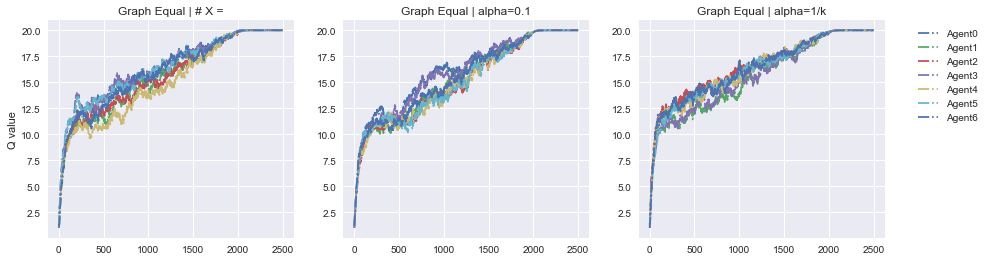

In [187]:
plt.show()

#### <font color='#425451'>Conclusion</font> 

The convergence of the Q value of the final action is similar to all graphs. What we can see is that at the second graph, with 2 agents of agents 0 and 3 have a slightly separated evolution around 1000 episodes. This difference may occurs due to the fact that both of them are connected with only same type agents. 